In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [10]:
# Single input variable (X) and target (y)
X=np.linspace(0,10,100)
y=3*X+5+np.random.randn(100)*2 #y=3x+5+ noise

#reshape for neural network
X=X.reshape(-1,1)

In [11]:
model_lr=Sequential([
    Dense(1,input_dim=1, activation='linear')
])

model_lr.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_lr=model_lr.fit(X,y, epochs=100, verbose=0)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model_dnn=Sequential([
    Dense(32, activation='relu', input_dim=1),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')
])

model_dnn.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_dnn=model_dnn.fit(X,y, epochs=100, verbose=0)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


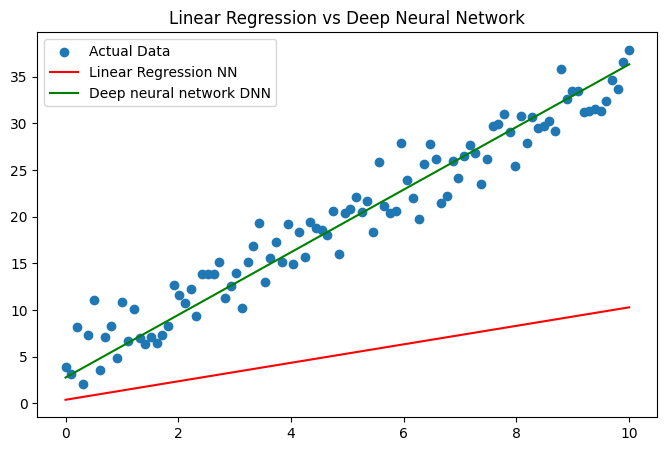

In [13]:
#predictions
y_pred_lr=model_lr.predict(X)
y_pred_dnn=model_dnn.predict(X)
plt.figure(figsize=(8,5))
plt.scatter(X,y, label='Actual Data')
plt.plot(X,y_pred_lr, color='red', label='Linear Regression NN')
plt.plot(X,y_pred_dnn, color='green', label='Deep neural network DNN')
plt.legend()
plt.title('Linear Regression vs Deep Neural Network')
plt.show()

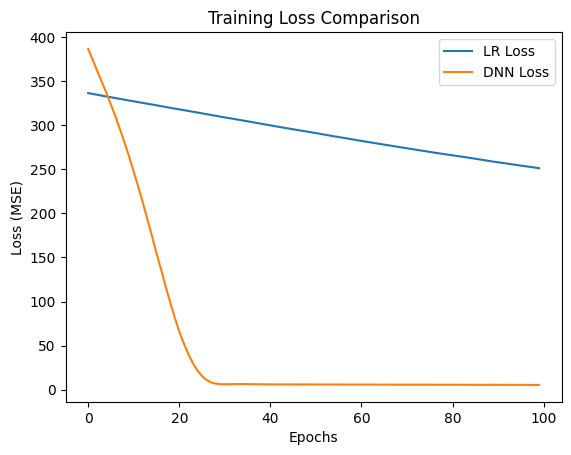

In [14]:
plt.plot(history_lr.history['loss'], label='LR Loss')
plt.plot(history_dnn.history['loss'], label='DNN Loss')
plt.legend()
plt.title("Training Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.show()